In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
colli=pd.read_csv('CollisionRecords.txt',sep=',',header=0,error_bad_lines=False)
party=pd.read_csv('PartyRecords.txt',sep=',',header=0,error_bad_lines=False)

b'Skipping line 1667771: expected 76 fields, saw 77\n'


In [28]:
new=pd.merge(colli,party, on='CASE_ID',how='right')

In [31]:
new.dropna(inplace=True, subset=['COLLISION_DATE','ACCIDENT_YEAR'])
new['MONTH']=new.COLLISION_DATE.apply(lambda x:str(int(x))[4:6])
new['YEAR']=new.ACCIDENT_YEAR.astype(int).astype(str)

In [34]:
new['DATE']=new.YEAR.add('-').add(new.MONTH)
new['DATE']=new.DATE.apply(lambda x:datetime.strptime(x,'%Y-%m'))

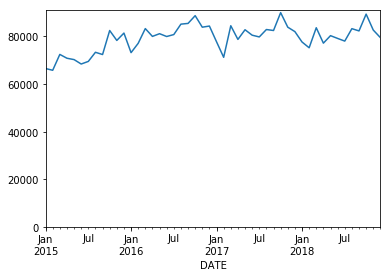

In [37]:
new.groupby('DATE')['CASE_ID'].count().iloc[:48].plot(kind='line',ylim=0)

In [4]:
drug=new[new['PARTY_DRUG_PHYSICAL']=='E']

In [5]:
new[new['PCF_VIOL_CATEGORY']=='01'].head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,MOVE_PRE_ACC,VEHICLE_YEAR,VEHICLE_MAKE,STWD_VEHICLE_TYPE,CHP_VEH_TYPE_TOWING,CHP_VEH_TYPE_TOWED,RACE,INATTENTION,SPECIAL_INFO_F,SPECIAL_INFO_G
10,6735220,2015.0,20150730.0,3000,20150101.0,230.0,2849,89147,4.0,5.0,...,G,2000.0,CHEVROLET,D,22.0,NaN,NaN,NaN,-,-
11,6735220,2015.0,20150730.0,3000,20150101.0,230.0,2849,89147,4.0,5.0,...,O,2006.0,TOYOTA,D,22.0,NaN,NaN,NaN,-,-
12,6735220,2015.0,20150730.0,3000,20150101.0,230.0,2849,89147,4.0,5.0,...,O,2005.0,SUZUKI,C,2.0,NaN,NaN,NaN,-,-
13,6735220,2015.0,20150730.0,3000,20150101.0,230.0,2849,89147,4.0,5.0,...,O,2002.0,JEEP,A,7.0,NaN,NaN,NaN,-,-
14,6735221,2015.0,20150730.0,3000,20150101.0,15.0,2849,891H5,4.0,5.0,...,M,1986.0,NISSAN,D,22.0,NaN,NaN,NaN,-,-


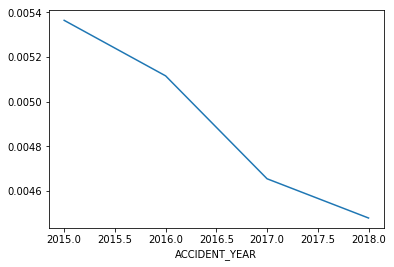

In [8]:
drugrate=(drug.groupby('ACCIDENT_YEAR')['CASE_ID'].count()/new.groupby('ACCIDENT_YEAR')['CASE_ID'].count()).iloc[0:4]
drugrate.plot()

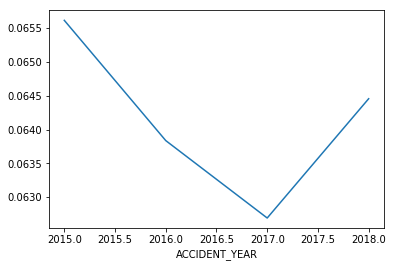

In [9]:
drug2=new[new['PCF_VIOL_CATEGORY']=='01']
duirate=(drug2.groupby('ACCIDENT_YEAR')['CASE_ID'].count()/new.groupby('ACCIDENT_YEAR')['CASE_ID'].count()).iloc[0:4]
duirate.plot()

In [10]:
severe=drug.groupby(['ACCIDENT_YEAR','COLLISION_SEVERITY'])['CASE_ID'].count()
severe.unstack(level=0)
severe2=new.groupby(['ACCIDENT_YEAR','COLLISION_SEVERITY'])['CASE_ID'].count()
severe=severe/severe2

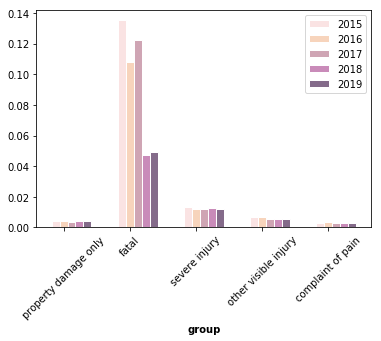

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.12
 
# set height of bar
bars0 = severe[2015]
bars1 = severe[2016]
bars2 = severe[2017]
bars3 = severe[2018]
bars4 = severe[2019]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars0, color='#FAE3E3', width=barWidth, edgecolor='white', label='2015')
plt.bar(r2, bars1, color='#F7D4BC', width=barWidth, edgecolor='white', label='2016')
plt.bar(r3, bars2, color='#CFA5B4', width=barWidth, edgecolor='white', label='2017')
plt.bar(r4, bars3, color='#C98BB9', width=barWidth, edgecolor='white', label='2018')
plt.bar(r5, bars4, color='#846B8A', width=barWidth, edgecolor='white', label='2019')


 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['property damage only','fatal','severe injury','other visible injury','complaint of pain'])
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()

    

In [73]:
drug=new[new['PARTY_DRUG_PHYSICAL']=='E']
drug.dropna(subset=['COLLISION_TIME','COLLISION_DATE'],inplace=True)
drug.COLLISION_DATE=drug.COLLISION_DATE.astype(int).astype(str)

drug.COLLISION_TIME=drug.COLLISION_TIME.apply(lambda x:str(int(x)).zfill(4)[0:2]+':00')
drug=drug[drug['COLLISION_TIME']<'24:00']
drug.COLLISION_TIME=drug.COLLISION_TIME.apply(lambda x:datetime.strptime(x,'%H:%M'))

#drug.COLLISION_TIME=drug.COLLISION_TIME.map({'00':'12AM','01':'1AM','02':'2AM','03':'3AM','04':'4AM','05':'5AM','06':'6AM','07':'7AM','08':'8AM','09':'9AM','10':'10AM','11':'11AM','12':'12PM','13':'1PM','14':'2PM','15':'3PM','16':'4PM','17':'5PM','18':'6PM','19':'7PM','20':'8PM','21':'9PM','22':'10PM','23':'11PM'})
drug['COLLISION_TIME']=drug.COLLISION_TIME.dt.time

In [74]:
heat=drug[['COLLISION_TIME','DAY_OF_WEEK','CASE_ID']]
heat.DAY_OF_WEEK=heat.DAY_OF_WEEK.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'})

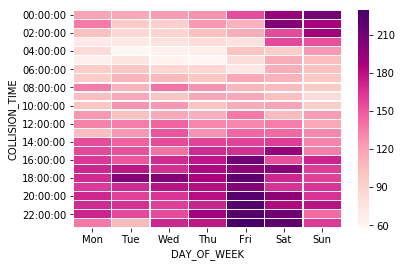

In [75]:
restr_data = heat.groupby(['COLLISION_TIME','DAY_OF_WEEK']).count()['CASE_ID'].unstack()

# Reordering columns
restr_data = restr_data[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
restr_data
import seaborn as sns
sns.heatmap(restr_data, cmap="RdPu",linewidth=.25)

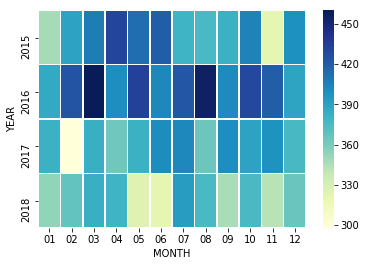

In [15]:
drug['MONTH']=drug.COLLISION_DATE.apply(lambda x:x[4:6])
drug['YEAR']=drug.ACCIDENT_YEAR.astype(int).astype(str)
heat2=drug[['MONTH','YEAR','CASE_ID']]
restr_data2 = heat2.groupby(['YEAR','MONTH']).count()['CASE_ID'].unstack()

# Reordering columns
#restr_data2 = restr_data2[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
restr_data2=restr_data2.iloc[0:4]
sns.heatmap(restr_data2, cmap="YlGnBu",linewidths=.5)

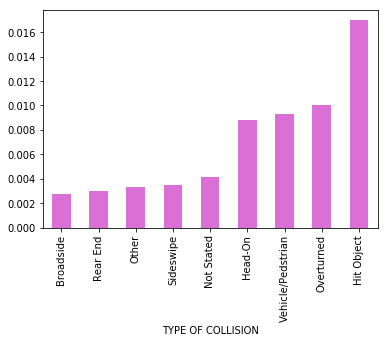

In [58]:
new['TYPE OF COLLISION']=new['TYPE_OF_COLLISION'].map({'A': 'Head-On','B':'Sideswipe','C': 'Rear End',\
                                                         'D':'Broadside','E':'Hit Object','F':'Overturned',\
                                                         'G':'Vehicle/Pedstrian','H':'Other','-':'Not Stated'})
drug['TYPE OF COLLISION']=drug['TYPE_OF_COLLISION'].map({'A': 'Head-On','B':'Sideswipe','C': 'Rear End',\
                                                         'D':'Broadside','E':'Hit Object','F':'Overturned',\
                                                         'G':'Vehicle/Pedstrian','H':'Other','-':'Not Stated'})
(drug.groupby('TYPE OF COLLISION')['CASE_ID'].count()/new.groupby('TYPE OF COLLISION')['CASE_ID'].count()).sort_values().plot(kind='bar',color='orchid')

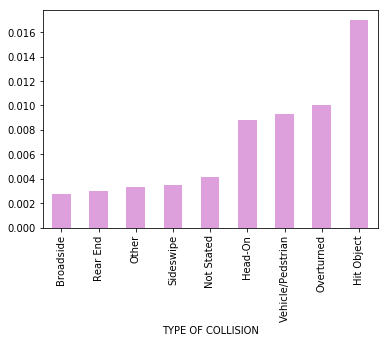

In [50]:
(drug.groupby('TYPE OF COLLISION')['CASE_ID'].count()/new.groupby('TYPE OF COLLISION')['CASE_ID'].count()).sort_values().plot(kind='bar',color='plum')

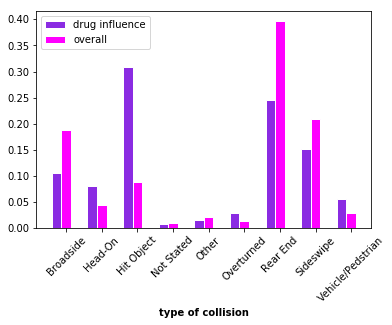

In [57]:
barWidth = 0.27
 
# set height of bar
bars0 = (drug.groupby('TYPE OF COLLISION')['CASE_ID'].count()/len(drug))
bars1 = (new.groupby('TYPE OF COLLISION')['CASE_ID'].count()/len(new))


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars0, color='blueviolet', width=barWidth, edgecolor='white', label='drug influence')
plt.bar(r2, bars1, color='magenta', width=barWidth, edgecolor='white', label='overall')
 
# Add xticks on the middle of the group bars
plt.xlabel('type of collision', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],bars0.index.tolist())
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()



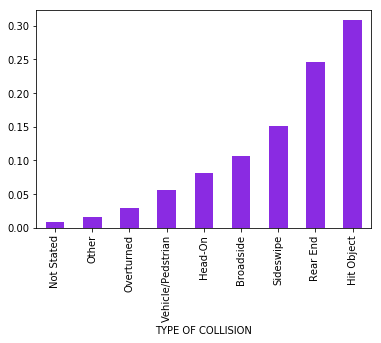

In [43]:
(drug.groupby('TYPE OF COLLISION')['CASE_ID'].count()/len(drug)).sort_values().plot(kind='bar',color='blueviolet')

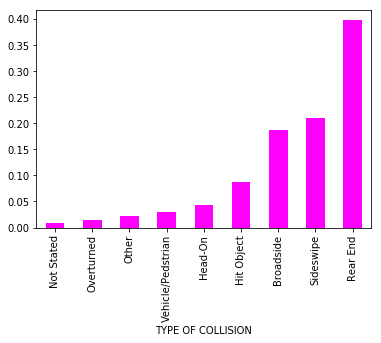

In [42]:
(new.groupby('TYPE OF COLLISION')['CASE_ID'].count()/len(new)).sort_values().plot(kind='bar',color='magenta')

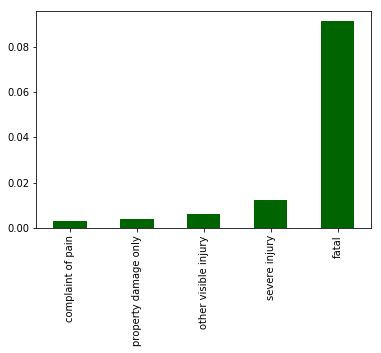

In [19]:
sev=(drug.groupby(['COLLISION_SEVERITY'])['CASE_ID'].count()/new.groupby(['COLLISION_SEVERITY'])['CASE_ID'].count())
sev.index=['property damage only','fatal','severe injury','other visible injury','complaint of pain']
sev.sort_values().plot(kind='bar', color='darkgreen')

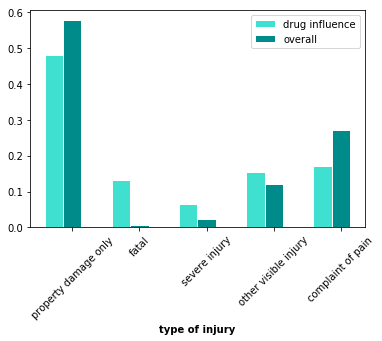

In [61]:
sev2=new.groupby(['COLLISION_SEVERITY'])['CASE_ID'].count()/len(new)
sev2.index=['property damage only','fatal','severe injury','other visible injury','complaint of pain']
sev3=drug.groupby(['COLLISION_SEVERITY'])['CASE_ID'].count()/len(drug)
sev3.index=['property damage only','fatal','severe injury','other visible injury','complaint of pain']
barWidth = 0.27
 
# set height of bar
bars0 = sev3
bars1 = sev2


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars0, color='turquoise', width=barWidth, edgecolor='white', label='drug influence')
plt.bar(r2, bars1, color='darkcyan', width=barWidth, edgecolor='white', label='overall')
 
# Add xticks on the middle of the group bars
plt.xlabel('type of injury', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],bars0.index.tolist())
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()

